<a href="https://colab.research.google.com/github/mogogo4/2025-HUDS-Bootcamp-Assignments-Project/blob/main/NBA_Analysis_2_Group_Project_Stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Research Question


####The NBA is a billion dollar industry and successful NBA teams enjoy greater audience share and revenue. In other words, winning pays. And NBA teams are highly motivated to find strategic advantages that produce enough wins over an 82-game regular season to make the play-offs and continue winning at the highest level of NBA competition. Which team is left standing, triumphant, at the end of it all and why? What can we learn from the elite NBA teams over the last 14 seasons (2010 - 2024)?



####NBA basketball is a fast-paced, team-game, played on a court that measures only 94 feet long and 50 feet wide. One of the smallest fields of play in professional sports. It favors skill, athleticism, intelligence and communication. Ask any casual observer to point out the most important player during an NBA basketball game and they would likely point to the leading scorer. But there have been multiple NBA League MVP's, greats of the game, who have never won an NBA Championship: Joel Embiid, James Harden, Russell Westbrook, Derrick Rose, Karl Malone and Charles Barkley. Perhaps not a suprise, given the pace and required team play in those confines. But in the 2015-2016 NBA Western Conference Finals, the Oklahoma City Thunder had an NBA League MVP, Kevin Durant (2014), and two future NBA League MVPs, James Harden (2018), and Russell Westbrook (2017) on the same team and lost in the Western Conference Finals to Steph Curry's Golden State Warriors. In fact, Kevin Durant went on to join the Golden State Warriors the following season (2016-2017) and outplayed Steph Curry to be named NBA Finals MVP for his first NBA Championship.



####The allure of offensive production seems to be rooted in history. Early box scores from 1949 only kept a player's field goals (number attempted), free throws (number attempted), and fouls committed. At the bottom there was a summary of the number of free throws missed. Interestingly, it did not include the number of field goals missed. According to the NBA.com website, defensive rebounds, offensive rebounds and blocks began being recorded in the 1973-1974 season. Turnovers began being recorded in the 1977-1978 season.

####But these days, and maybe back then, too, winning coaches and players seem to be unanimous in their praise of defense. To better understand these undervalued metrics, historically speaking, we look to explore defensive metrics in NBA basketball play-off games and reveal their impact on winning to the casual observer.



##Problem Statement

####To what extent do NBA teams that tend to average a higher frequency of successful defensive plays — such as blocks, steals, and rebounds — increase their likelihood of winning games in the NBA? A common adage among basketball coaches and players is that defense wins games. This analysis seeks to gain a better understanding of whether successful defensive plays such as blocks, steals, rebounds, and forced turnovers (including shot clock violations, 3-second rule, and 10-second rule) are associated with a higher win percentage throughout the season. We aim to determine which defensive performance indicators are positively associated with play-off win percentage.


##Data Description

National Basketball Association Performance Metrics 🏀

 Last Updated: Summer 2024

NBA Data Raw Source

https://github.com/laketalkemp/2025-HUDS-Bootcamp/blob/main/Data/NBA-Data/readme.md

Comprehensive NBA data beginning with the 2009-2010 season and ending with the 2023-2024 season. The dataset has team and player identifiers, as well as offensive and defensive metrics including: minutes played by the player, field goals made by the player, field goals attempted by the player, shooting percentage for field goals, three-pointers made by the player, three-pointers attempted by the player, shooting percentage for three-pointers, free throws made by the player, free throws attempted by the player, shooting percentage for free throws, offensive rebounds by the player, defensive rebounds by the player, total number of rebounds by the player, assists by the player, steals by the player, blocks by the player, opponent's blocks, turnovers by the player, personal fouls committed by the player, personal fouls drawn, total number of points scored by the player, plus-minus statistic for the player (indicating the team's score differential when the player is on the court), rank based on games played, rank based on wins, rank based on losses, rank based on win percentage, rank based on minutes played. Ranks for statistical categories like field goals made, rebounds, assists, etc., indicated by suffix _RANK.



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
# importing the libraries
import numpy as np # Scientific Computing
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical Data Visualization

In [16]:
# Upload data to Colab environment instead of mount Google Drive
# click the file three vertical buttons to copy path:
# /content/play_off_box_scores_2010_2024.csv

In [19]:
# Read the nba play_off_box_scores .csv file stored in Google Drive
play_off = pd.read_csv("/content/drive/MyDrive/HUDS 2025 NBA Final Project/play_off_box_scores_2010_2024.csv")

# make a copy of play_off data
play_off2 = play_off

In [20]:
# check play_off2 copy
play_off2.head(7)

,season_year,game_date,gameId,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2011-12,2012-06-03,41100304,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
1,2011-12,2012-06-09,41100307,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
2,2010-11,2011-06-05,41000403,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,1,1,1,0,0,0,1,1,6
3,2011-12,2012-04-28,41100111,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,3
4,2011-12,2012-05-15,41100202,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
5,2010-11,2011-05-31,41000401,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,3,0,3,0,0,0,0,0,2,2
6,2010-11,2011-05-07,41000213,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Calling the first seven rows of play_off data
play_off.head(7)

,season_year,game_date,gameId,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2011-12,2012-06-03,41100304,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
1,2011-12,2012-06-09,41100307,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
2,2010-11,2011-06-05,41000403,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,1,1,1,0,0,0,1,1,6
3,2011-12,2012-04-28,41100111,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,3
4,2011-12,2012-05-15,41100202,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
5,2010-11,2011-05-31,41000401,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,3,0,3,0,0,0,0,0,2,2
6,2010-11,2011-05-07,41000213,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Calling the last seven rows of the dataframe
play_off.tail(7)

,season_year,game_date,gameId,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
31178,2023-24,2024-04-23,42300162,1610612756,Phoenix,Suns,PHX,suns,1629642,Nassir Little,...,0,0,0,0,0,0,0,0,5,5
31179,2023-24,2024-04-26,42300163,1610612756,Phoenix,Suns,PHX,suns,1629642,Nassir Little,...,0,0,0,0,0,0,0,0,0,0
31180,2023-24,2024-04-20,42300161,1610612756,Phoenix,Suns,PHX,suns,1629642,Nassir Little,...,0,0,0,0,0,0,0,0,2,-5
31181,2023-24,2024-04-28,42300164,1610612756,Phoenix,Suns,PHX,suns,201152,Thaddeus Young,...,0,0,0,0,0,0,0,0,0,0
31182,2023-24,2024-04-23,42300162,1610612756,Phoenix,Suns,PHX,suns,201152,Thaddeus Young,...,0,0,0,0,0,0,0,0,0,0
31183,2023-24,2024-04-26,42300163,1610612756,Phoenix,Suns,PHX,suns,201152,Thaddeus Young,...,0,0,0,0,0,0,0,0,0,0
31184,2023-24,2024-04-20,42300161,1610612756,Phoenix,Suns,PHX,suns,201152,Thaddeus Young,...,0,0,0,0,0,0,0,0,0,-5


In [23]:
# Find the number of rows , cols for play_off data
play_off.shape

(31185, 33)

In [24]:
# Find the number of play_off data point rows x cols
play_off.size

1029105

In [25]:
# Missing data frames?
def missing(DataFrame):
  print("Percentage of missing values in the dataset:\n",
        round((DataFrame.isnull().sum()*100/len(DataFrame)),2).sort_values(ascending=False))
missing(play_off)

Percentage of missing values in the dataset:
 jerseyNum                  100.00
comment                     79.85
position                    62.13
minutes                     20.15
season_year                  0.00
game_date                    0.00
gameId                       0.00
teamId                       0.00
teamCity                     0.00
personId                     0.00
teamSlug                     0.00
teamTricode                  0.00
teamName                     0.00
personName                   0.00
fieldGoalsMade               0.00
fieldGoalsAttempted          0.00
fieldGoalsPercentage         0.00
threePointersMade            0.00
threePointersAttempted       0.00
threePointersPercentage      0.00
freeThrowsMade               0.00
freeThrowsAttempted          0.00
freeThrowsPercentage         0.00
reboundsOffensive            0.00
reboundsDefensive            0.00
reboundsTotal                0.00
assists                      0.00
steals                       0.00
bl

In [ ]:
# Let's investigate the missing values for comment, position, and minutes
# check the first 100
null_data = play_off[play_off.isnull().any(axis=1)]
null_data.head(10)

,season_year,game_date,gameId,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2011-12,2012-06-03,41100304,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
1,2011-12,2012-06-09,41100307,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
2,2010-11,2011-06-05,41000403,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,1,1,1,0,0,0,1,1,6
3,2011-12,2012-04-28,41100111,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,3
4,2011-12,2012-05-15,41100202,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
5,2010-11,2011-05-31,41000401,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,3,0,3,0,0,0,0,0,2,2
6,2010-11,2011-05-07,41000213,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
7,2010-11,2011-06-02,41000402,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
8,2011-12,2012-05-13,41100201,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0
9,2010-11,2011-05-24,41000304,1610612748,Miami,Heat,MIA,heat,436,Juwan Howard,...,0,0,0,0,0,0,0,0,0,0


## Null Values (percentage of missing values)
####All of the metrics that will be used for this analysis have complete data (0% missing). Although minutes played has incomplete data (20% missing) that may be due to shorter player rotations in the play-offs as a result of player injury or player inexperience. We include minutes in our Play-Off dataset as it may prove to be an important factor in overall team performance in future studies.

In [31]:
# delete the null columns
nullcolumns = play_off[['jerseyNum', 'comment', 'position']]
play_off = play_off.drop(labels=None, axis=0, index=None, columns=nullcolumns, level=None, inplace=False, errors='raise')

In [32]:
# check to see if null columns have been dropped from play_off data frame
def missing(DataFrame):
  print("Percentage of missing values in the dataset:\n",
        round((DataFrame.isnull().sum()*100/len(DataFrame)),2).sort_values(ascending=False))
missing(play_off)

Percentage of missing values in the dataset:
 minutes                    20.15
season_year                 0.00
gameId                      0.00
teamId                      0.00
teamCity                    0.00
game_date                   0.00
teamName                    0.00
teamTricode                 0.00
personId                    0.00
teamSlug                    0.00
personName                  0.00
fieldGoalsMade              0.00
fieldGoalsAttempted         0.00
fieldGoalsPercentage        0.00
threePointersMade           0.00
threePointersAttempted      0.00
threePointersPercentage     0.00
freeThrowsMade              0.00
freeThrowsAttempted         0.00
freeThrowsPercentage        0.00
reboundsOffensive           0.00
reboundsDefensive           0.00
reboundsTotal               0.00
assists                     0.00
steals                      0.00
blocks                      0.00
turnovers                   0.00
foulsPersonal               0.00
points                      0.

In [33]:
# Check the data types for the 30 variables (after null vars deleted)
play_off.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season_year              31185 non-null  object 
 1   game_date                31185 non-null  object 
 2   gameId                   31185 non-null  int64  
 3   teamId                   31185 non-null  int64  
 4   teamCity                 31185 non-null  object 
 5   teamName                 31185 non-null  object 
 6   teamTricode              31185 non-null  object 
 7   teamSlug                 31185 non-null  object 
 8   personId                 31185 non-null  int64  
 9   personName               31185 non-null  object 
 10  minutes                  24902 non-null  object 
 11  fieldGoalsMade           31185 non-null  int64  
 12  fieldGoalsAttempted      31185 non-null  int64  
 13  fieldGoalsPercentage     31185 non-null  float64
 14  threePointersMade     

In [42]:
# remove scientific notation

pd.options.display.float_format = '{:,.2f}'.format

In [43]:
# see descriptive stats
play_off.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,"31,185.00","41,670,420.86","406,386.49","41,000,101.00","41,300,211.00","41,700,135.00","42,000,301.00","42,300,405.00"
teamId,"31,185.00","1,610,612,749.39",8.21,"1,610,612,737.00","1,610,612,743.00","1,610,612,748.00","1,610,612,757.00","1,610,612,766.00"
personId,"31,185.00","587,909.25","683,133.69",255.00,"200,797.00","202,696.00","1,627,737.00","1,641,816.00"
fieldGoalsMade,"31,185.00",2.84,3.32,0.00,0.00,2.00,5.00,22.00
fieldGoalsAttempted,"31,185.00",6.30,6.65,0.00,0.00,4.00,10.00,43.00
fieldGoalsPercentage,"31,185.00",0.32,0.29,0.00,0.00,0.33,0.50,1.00
threePointersMade,"31,185.00",0.75,1.28,0.00,0.00,0.00,1.00,12.00
threePointersAttempted,"31,185.00",2.14,2.83,0.00,0.00,1.00,4.00,19.00
threePointersPercentage,"31,185.00",0.17,0.27,0.00,0.00,0.00,0.33,1.00
freeThrowsMade,"31,185.00",1.36,2.34,0.00,0.00,0.00,2.00,24.00


In [44]:
play_offCorr = play_off.corr(numeric_only=True)
play_offCorr

,gameId,teamId,personId,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
gameId,1.00,-0.10,0.62,0.01,-0.00,-0.02,0.11,0.13,0.06,-0.04,...,-0.04,-0.01,-0.02,0.03,-0.04,-0.04,-0.04,-0.06,0.01,0.00
teamId,-0.10,1.00,-0.04,-0.00,0.00,0.00,-0.04,-0.05,-0.01,0.02,...,0.01,-0.00,0.00,-0.02,0.00,0.00,-0.00,0.02,-0.00,-0.03
personId,0.62,-0.04,1.00,-0.10,-0.11,-0.08,-0.01,-0.01,-0.02,-0.10,...,-0.08,-0.12,-0.12,-0.09,-0.10,-0.07,-0.11,-0.13,-0.10,-0.01
fieldGoalsMade,0.01,-0.00,-0.10,1.00,0.92,0.59,0.61,0.63,0.44,0.59,...,0.37,0.61,0.61,0.59,0.43,0.29,0.56,0.48,0.97,0.17
fieldGoalsAttempted,-0.00,0.00,-0.11,0.92,1.00,0.44,0.58,0.73,0.38,0.63,...,0.37,0.63,0.63,0.65,0.47,0.28,0.61,0.51,0.92,0.08
fieldGoalsPercentage,-0.02,0.00,-0.08,0.59,0.44,1.00,0.37,0.28,0.48,0.28,...,0.30,0.41,0.43,0.29,0.26,0.25,0.31,0.43,0.56,0.14
threePointersMade,0.11,-0.04,-0.01,0.61,0.58,0.37,1.00,0.84,0.74,0.29,...,0.04,0.30,0.25,0.38,0.29,0.08,0.32,0.29,0.67,0.17
threePointersAttempted,0.13,-0.05,-0.01,0.63,0.73,0.28,0.84,1.00,0.51,0.38,...,0.07,0.38,0.32,0.49,0.37,0.10,0.42,0.37,0.68,0.08
threePointersPercentage,0.06,-0.01,-0.02,0.44,0.38,0.48,0.74,0.51,1.00,0.19,...,0.02,0.22,0.18,0.28,0.22,0.05,0.23,0.25,0.48,0.14
freeThrowsMade,-0.04,0.02,-0.10,0.59,0.63,0.28,0.29,0.38,0.19,1.00,...,0.28,0.48,0.48,0.48,0.33,0.23,0.48,0.36,0.73,0.10


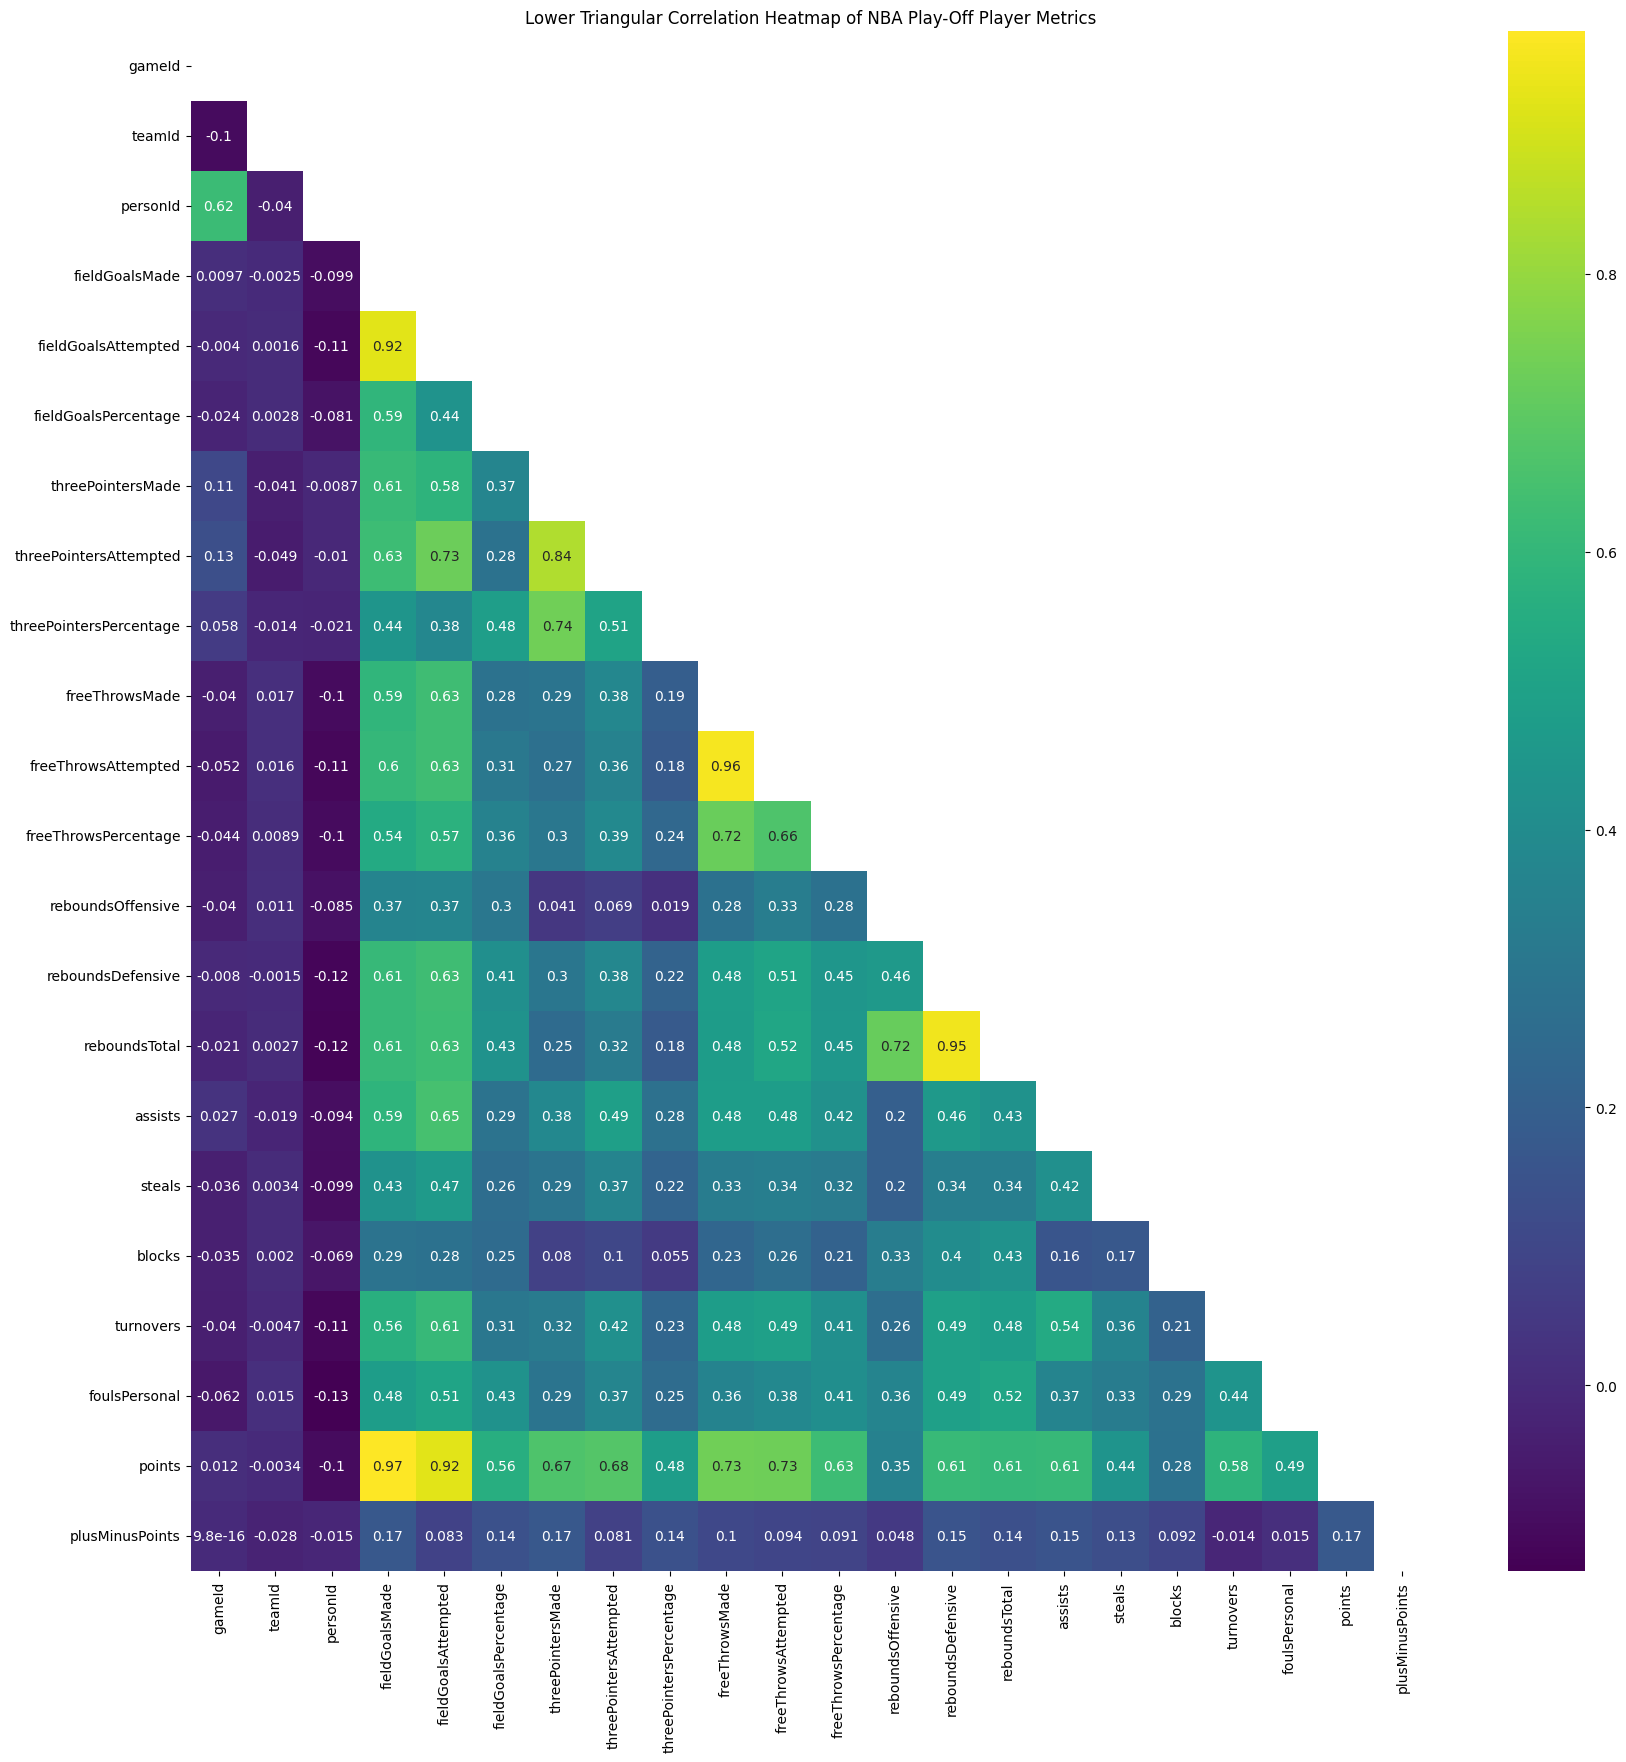

In [95]:
# create a correlation matrix with only the lower triangle
mask = np.triu(np.ones_like(play_offCorr, dtype=bool))
# create heatmap
plt.figure(figsize=(20,20))
sns.heatmap(play_offCorr, mask=mask, annot=True, cmap='viridis')
plt.title('Lower Triangular Correlation Heatmap of NBA Play-Off Player Metrics')
plt.show()

##Correlation Analysis
####Using player points as the dependent variable and as a proxy for winning strategy, a clear defensive performance indicator emerges. Defensive rebounds and total rebounds is almost as strongly correlated with player points as some offensive indicators for play-off players. For example, the relationship between 3-point field goals made and points for the player is moderately strong (positive), as we would expect. The correlation coefficient is 0.67. However, it is somewhat suprising that defensive rebounds and total rebounds also share a similarly strong relationship with points for the player with a correlation coefficient of 0.61 for both. In fact, turnovers are not far behind with a correlation coefficient of 0.58. It seems that play-off caliber players with a dominant defensive skillset are quite impactful on team point production.

##Analysis (continued)

####From these play-off player performance insights, we now turn our attention to Play-Off Totals, a separate datset that includes play-off game totals for each team for offensive and defensive metrics, as well as their play-off ranking in each metric. The Play-Off Totals dataset also includes Win Percentage Rank, which we now use to represent winning.

In [55]:
# create a data frame for Play-Off Totals for team play. Read the nba play_off_box_scores .csv file stored in Google Drive
play_offTot = pd.read_csv("/content/drive/MyDrive/HUDS 2025 NBA Final Project/play_off_totals_2010_2024.csv")

In [56]:
play_offTot.head(7)

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2010-11,1610612737,ATL,Atlanta Hawks,41000205,2011-05-10T00:00:00,ATL @ CHI,L,48.00,34,...,43,32,159,70,18,68,142,140,139,NaN
1,2010-11,1610612737,ATL,Atlanta Hawks,41000201,2011-05-02T00:00:00,ATL @ CHI,W,48.00,40,...,43,16,35,21,109,22,142,24,39,NaN
2,2010-11,1610612737,ATL,Atlanta Hawks,41000202,2011-05-04T00:00:00,ATL @ CHI,L,48.00,26,...,137,51,15,3,66,8,129,159,145,NaN
3,2010-11,1610612737,ATL,Atlanta Hawks,41000132,2011-04-19T00:00:00,ATL @ ORL,L,48.00,32,...,123,107,67,38,6,144,85,144,106,NaN
4,2010-11,1610612737,ATL,Atlanta Hawks,41000135,2011-04-26T00:00:00,ATL @ ORL,L,48.00,25,...,123,63,153,122,42,79,28,157,159,NaN
5,2010-11,1610612737,ATL,Atlanta Hawks,41000131,2011-04-16T00:00:00,ATL @ ORL,W,48.00,38,...,62,16,35,158,18,152,40,24,28,NaN
6,2010-11,1610612738,BOS,Boston Celtics,41000215,2011-05-11T00:00:00,BOS @ MIA,L,48.00,33,...,123,134,125,70,18,124,110,118,131,NaN


In [57]:
play_offTot.tail(7)

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
2355,2023-24,1610612752,NYK,New York Knicks,42300111,2024-04-20T00:00:00,NYK vs. PHI,W,48.00,36,...,116,71,73,22,127,62,44,54,53,1.00
2356,2023-24,1610612747,LAL,Los Angeles Lakers,42300151,2024-04-20T00:00:00,LAL @ DEN,L,48.00,39,...,90,71,151,22,57,17,56,97,121,1.00
2357,2023-24,1610612756,PHX,Phoenix Suns,42300161,2024-04-20T00:00:00,PHX @ MIN,L,48.00,33,...,156,130,18,39,12,79,16,129,153,1.00
2358,2023-24,1610612739,CLE,Cleveland Cavaliers,42300131,2024-04-20T00:00:00,CLE vs. ORL,W,48.00,36,...,103,154,18,85,127,110,9,120,31,1.00
2359,2023-24,1610612750,MIN,Minnesota Timberwolves,42300161,2024-04-20T00:00:00,MIN vs. PHX,W,48.00,44,...,35,130,34,132,101,143,73,21,11,1.00
2360,2023-24,1610612755,PHI,Philadelphia 76ers,42300111,2024-04-20T00:00:00,PHI @ NYK,L,48.00,36,...,149,55,34,22,127,110,87,92,106,1.00
2361,2023-24,1610612753,ORL,Orlando Magic,42300131,2024-04-20T00:00:00,ORL @ CLE,L,48.00,28,...,156,71,3,22,57,150,44,161,133,1.00


In [119]:
play_offTot.shape

(2362, 57)

In [58]:
# Missing data frames for play-off Totals?

def missing(DataFrame):
  print("Percentage of missing values in the dataset:\n",
        round((DataFrame.isnull().sum()*100/len(DataFrame)),2).sort_values(ascending=False))

missing(play_offTot)

Percentage of missing values in the dataset:
 AVAILABLE_FLAG      14.23
TEAM_ID              0.00
TEAM_ABBREVIATION    0.00
TEAM_NAME            0.00
GAME_ID              0.00
GAME_DATE            0.00
MATCHUP              0.00
WL                   0.00
SEASON_YEAR          0.00
FGM                  0.00
FGA                  0.00
FG_PCT               0.00
FG3M                 0.00
FG3A                 0.00
FG3_PCT              0.00
FTM                  0.00
FTA                  0.00
FT_PCT               0.00
OREB                 0.00
DREB                 0.00
REB                  0.00
AST                  0.00
TOV                  0.00
STL                  0.00
MIN                  0.00
BLK                  0.00
BLKA                 0.00
PFD                  0.00
PF                   0.00
PLUS_MINUS           0.00
GP_RANK              0.00
W_RANK               0.00
PTS                  0.00
W_PCT_RANK           0.00
MIN_RANK             0.00
FGM_RANK             0.00
FGA_RANK          

In [59]:
# remove scientific notation

pd.options.display.float_format = '{:,.2f}'.format

In [60]:
# see descriptive stats for play-off Totals
play_offTot.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,"2,362.00","1,610,612,749.39",8.23,"1,610,612,737.00","1,610,612,743.00","1,610,612,748.00","1,610,612,757.00","1,610,612,766.00"
GAME_ID,"2,362.00","41,656,424.51","406,289.01","41,000,101.00","41,300,172.00","41,700,106.00","42,000,214.00","42,300,405.00"
MIN,"2,362.00",48.35,1.53,48.00,48.00,48.00,48.00,68.00
FGM,"2,362.00",37.49,5.33,19.00,34.00,37.00,41.00,58.00
FGA,"2,362.00",83.24,7.63,61.00,78.00,83.00,88.00,124.00
FG_PCT,"2,362.00",0.45,0.06,0.26,0.41,0.45,0.49,0.67
FG3M,"2,362.00",9.94,4.24,0.00,7.00,10.00,13.00,25.00
FG3A,"2,362.00",28.25,8.96,6.00,22.00,28.00,35.00,58.00
FG3_PCT,"2,362.00",0.35,0.10,0.00,0.29,0.35,0.41,0.73
FTM,"2,362.00",18.01,6.00,2.00,14.00,18.00,22.00,43.00


In [61]:
play_offTotCorr = play_offTot.corr(numeric_only=True)
play_offTotCorr

,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
TEAM_ID,1.00,-0.10,0.04,-0.03,0.01,-0.03,-0.17,-0.21,-0.02,0.08,...,0.10,-0.03,-0.01,-0.01,0.05,0.05,-0.03,0.02,0.05,-0.02
GAME_ID,-0.10,1.00,-0.08,0.32,0.33,0.12,0.51,0.66,0.06,-0.10,...,-0.02,-0.02,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02,-0.02,0.16
MIN,0.04,-0.08,1.00,0.16,0.32,-0.05,0.02,0.05,-0.03,0.08,...,-0.05,0.08,-0.08,-0.09,0.09,0.14,-0.12,-0.17,0.00,-0.05
FGM,-0.03,0.32,0.16,1.00,0.50,0.77,0.44,0.26,0.39,-0.18,...,-0.55,-0.15,-0.12,-0.08,-0.12,0.07,0.07,-0.75,-0.48,0.04
FGA,0.01,0.33,0.32,0.50,1.00,-0.16,0.25,0.44,-0.10,-0.23,...,-0.19,-0.24,-0.14,-0.05,0.27,0.04,0.09,-0.23,-0.03,0.05
FG_PCT,-0.03,0.12,-0.05,0.77,-0.16,1.00,0.31,-0.02,0.52,-0.04,...,-0.48,0.01,-0.03,-0.05,-0.33,0.06,0.01,-0.68,-0.52,0.01
FG3M,-0.17,0.51,0.02,0.44,0.25,0.31,1.00,0.79,0.65,-0.13,...,-0.31,0.00,-0.05,-0.05,-0.07,0.02,0.07,-0.41,-0.29,0.08
FG3A,-0.21,0.66,0.05,0.26,0.44,-0.02,0.79,1.00,0.11,-0.13,...,-0.11,-0.02,-0.04,-0.04,-0.02,0.00,0.05,-0.12,-0.06,0.11
FG3_PCT,-0.02,0.06,-0.03,0.39,-0.10,0.52,0.65,0.11,1.00,-0.06,...,-0.36,0.03,-0.02,-0.03,-0.09,0.03,0.06,-0.50,-0.37,0.00
FTM,0.08,-0.10,0.08,-0.18,-0.23,-0.04,-0.13,-0.13,-0.06,1.00,...,0.12,0.02,-0.03,-0.05,-0.03,0.22,-0.67,-0.30,-0.12,-0.00


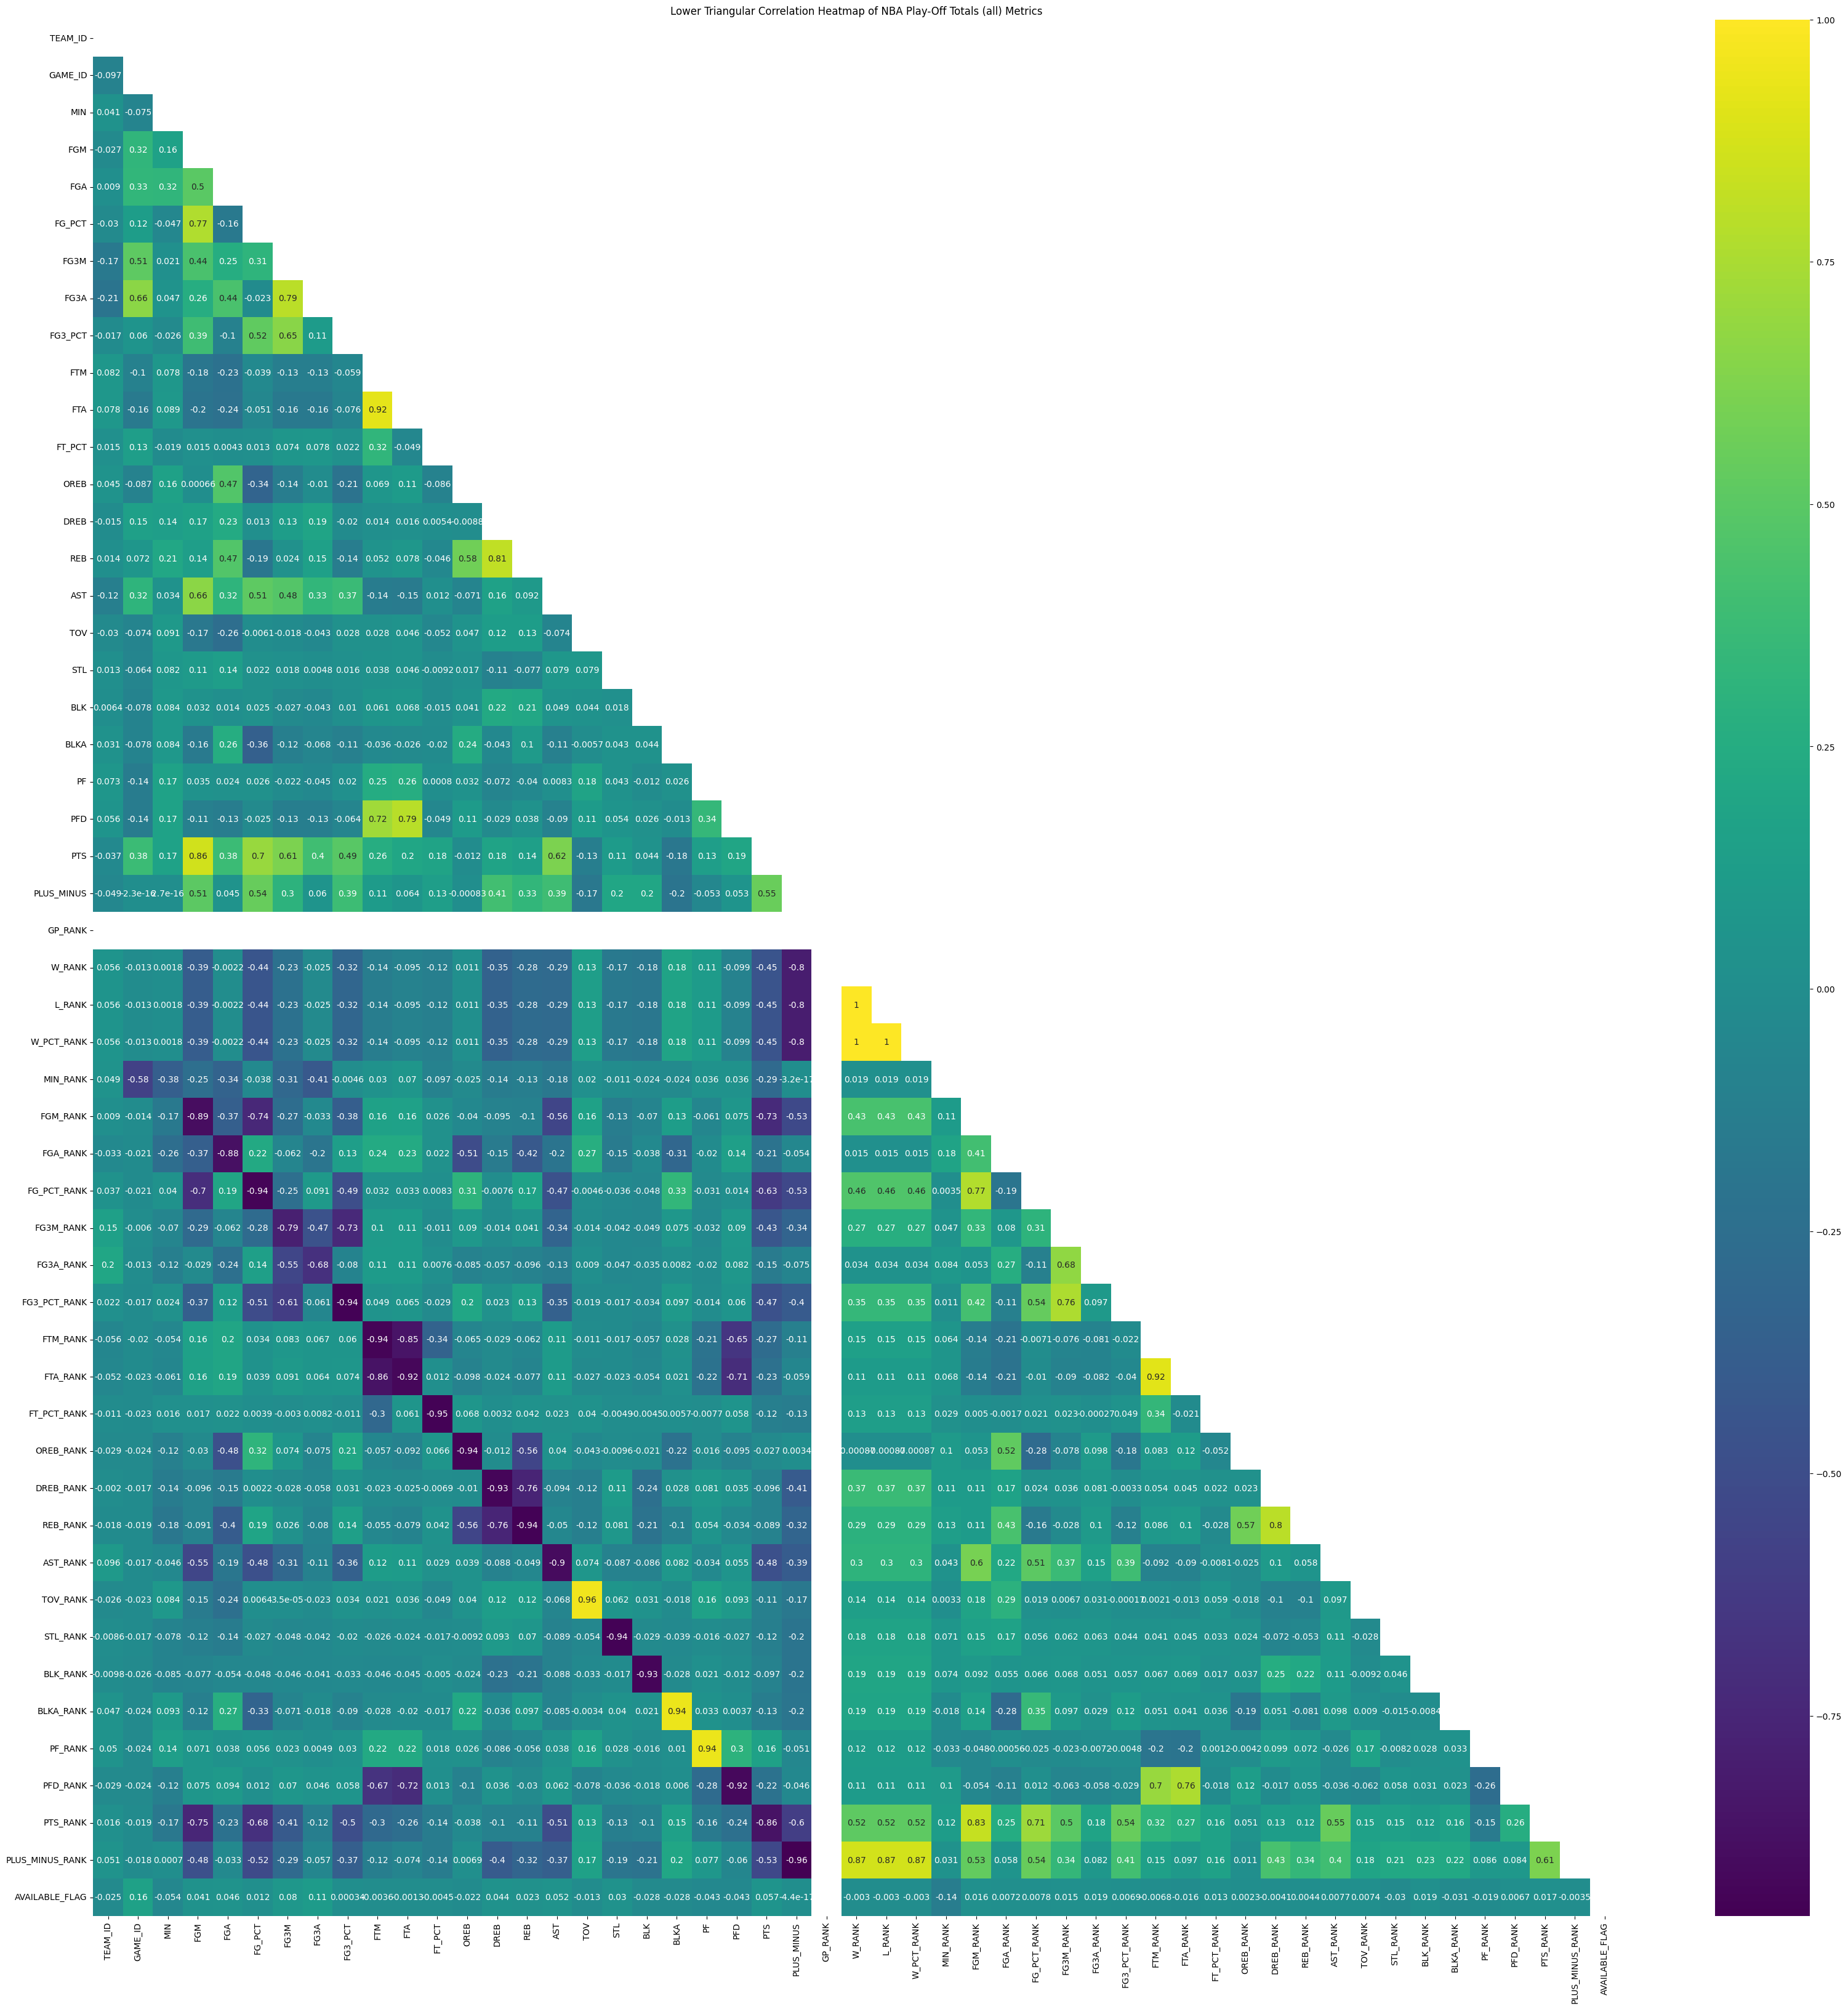

In [96]:
# create a correlation matrix with only the lower triangle
mask = np.triu(np.ones_like(play_offTotCorr, dtype=bool))
# create heatmap
plt.figure(figsize=(40,40))
sns.heatmap(play_offTotCorr, mask=mask, annot=True, cmap='viridis')
plt.title('Lower Triangular Correlation Heatmap of NBA Play-Off Totals (all) Metrics')
plt.show()

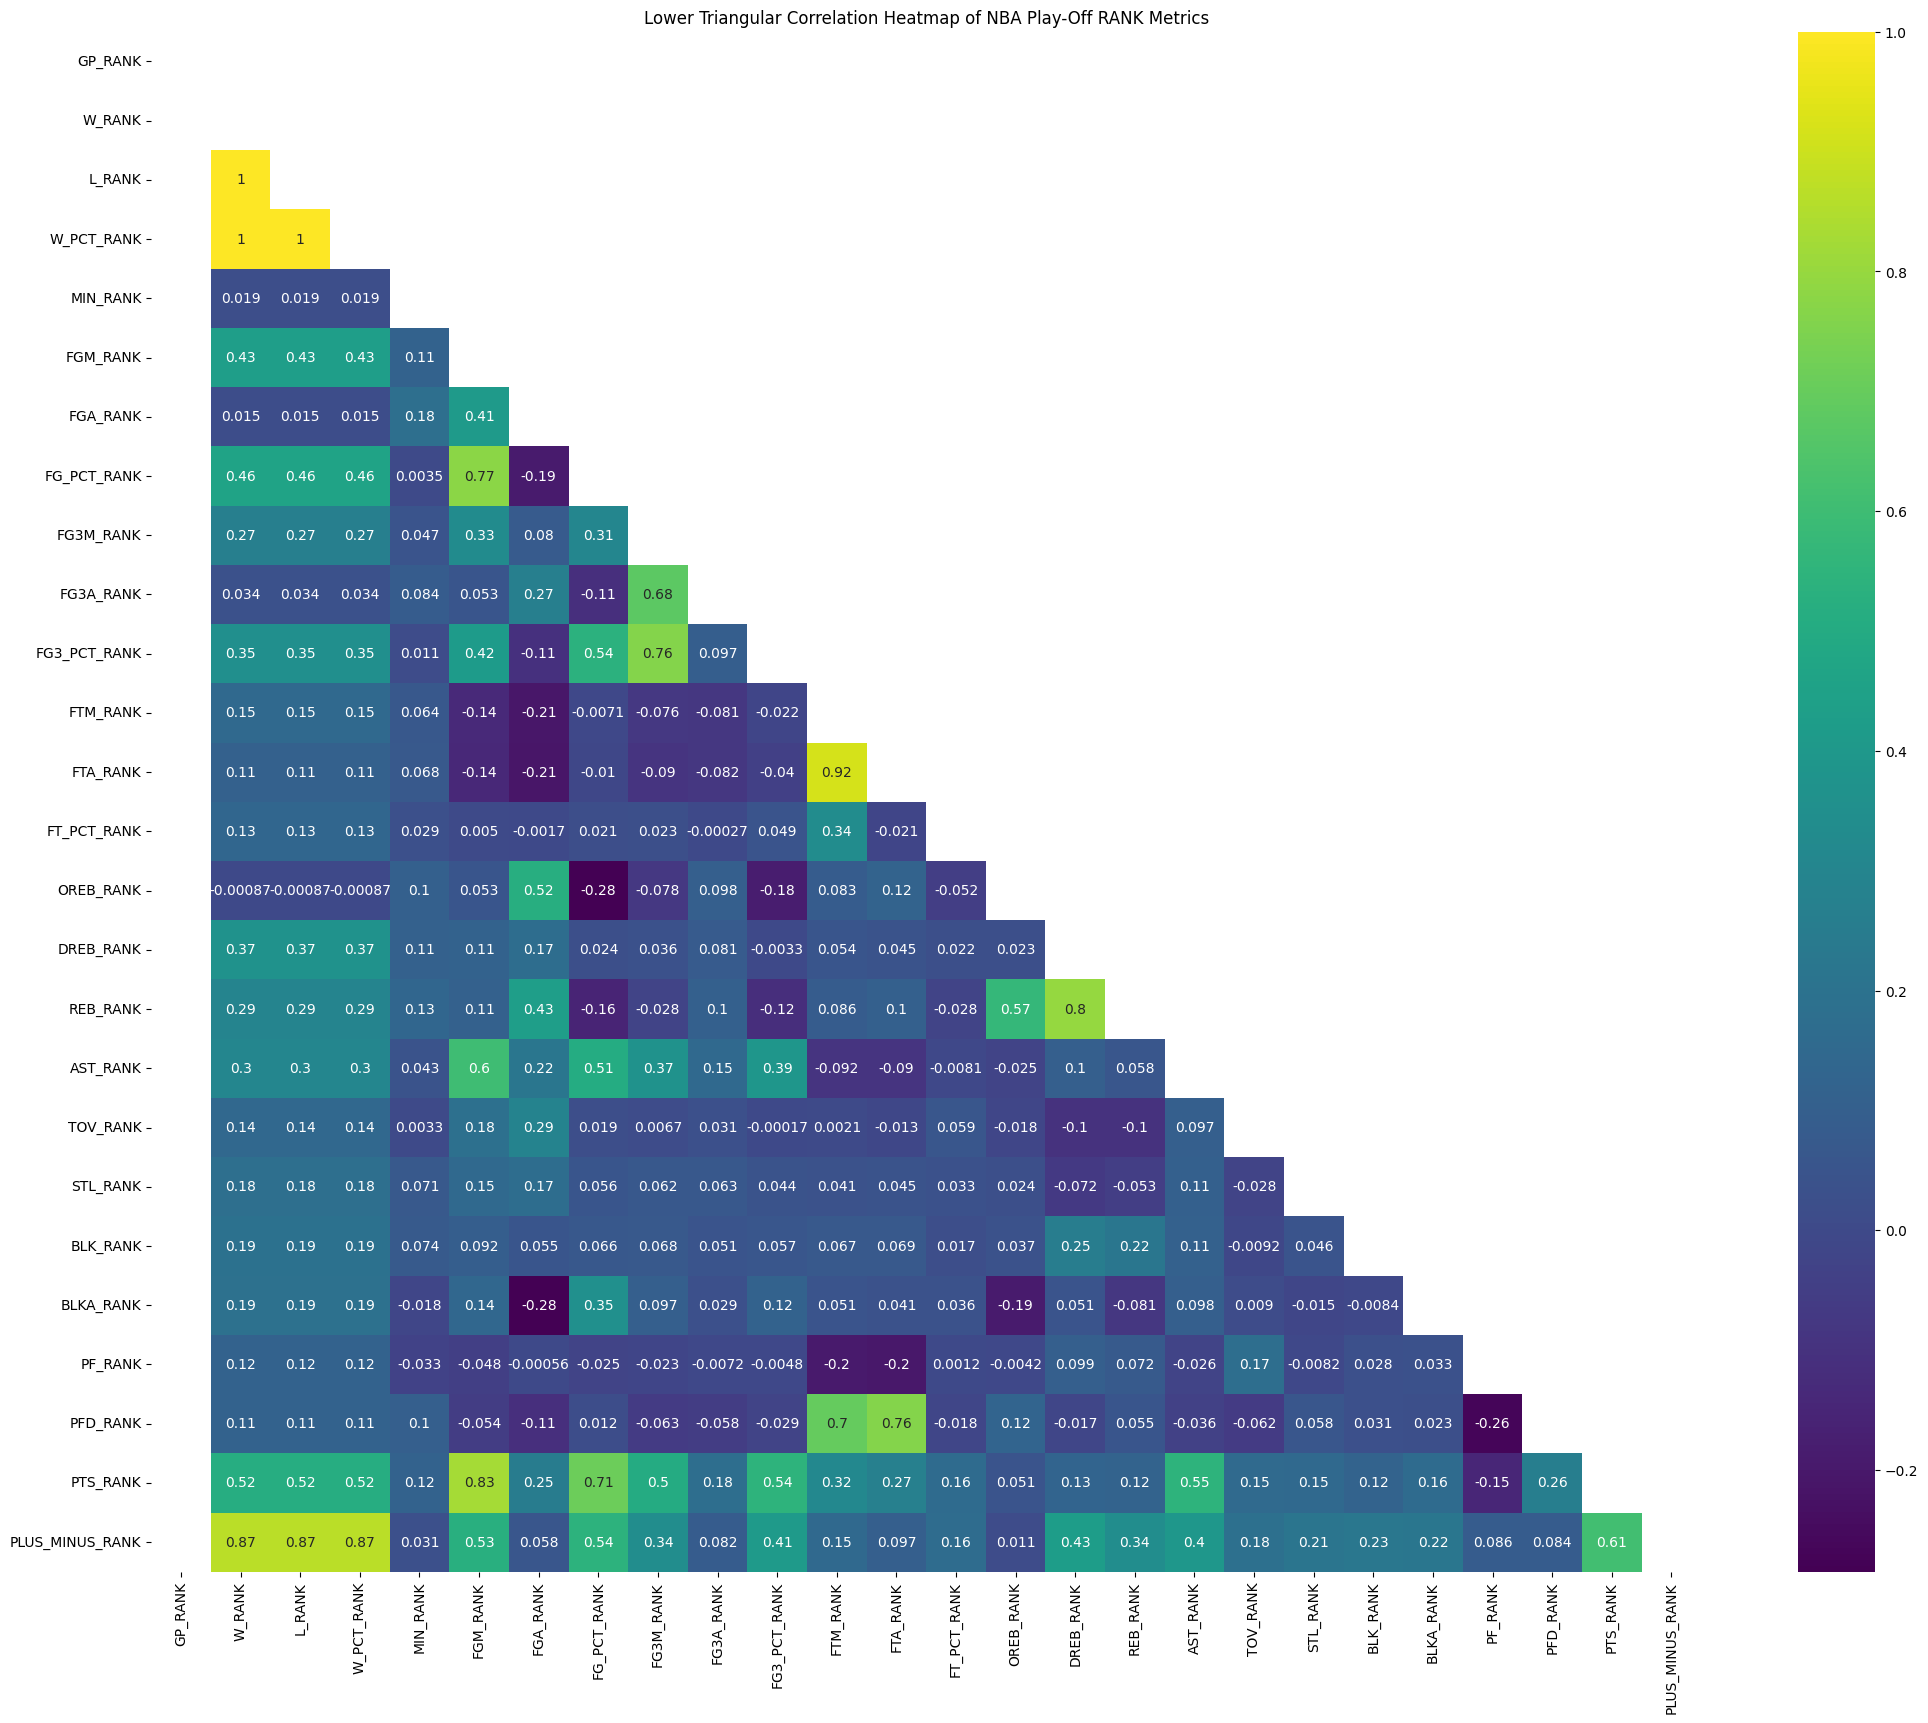

In [80]:
# create a new DataFrame containing only columns with "_RANK"
play_offTot_rank_corr = play_offTot.filter(regex='_RANK$', axis=1).corr(numeric_only=True)
# create a correlation matrix with only the lower triangle
mask_rank = np.triu(np.ones_like(play_offTot_rank_corr, dtype=bool))
# create heatmap for rank correlations
plt.figure(figsize=(25,20))
sns.heatmap(play_offTot_rank_corr, mask=mask_rank, annot=True, cmap='viridis')
plt.title('Lower Triangular Correlation Heatmap of NBA Play-Off RANK Metrics')
plt.show()

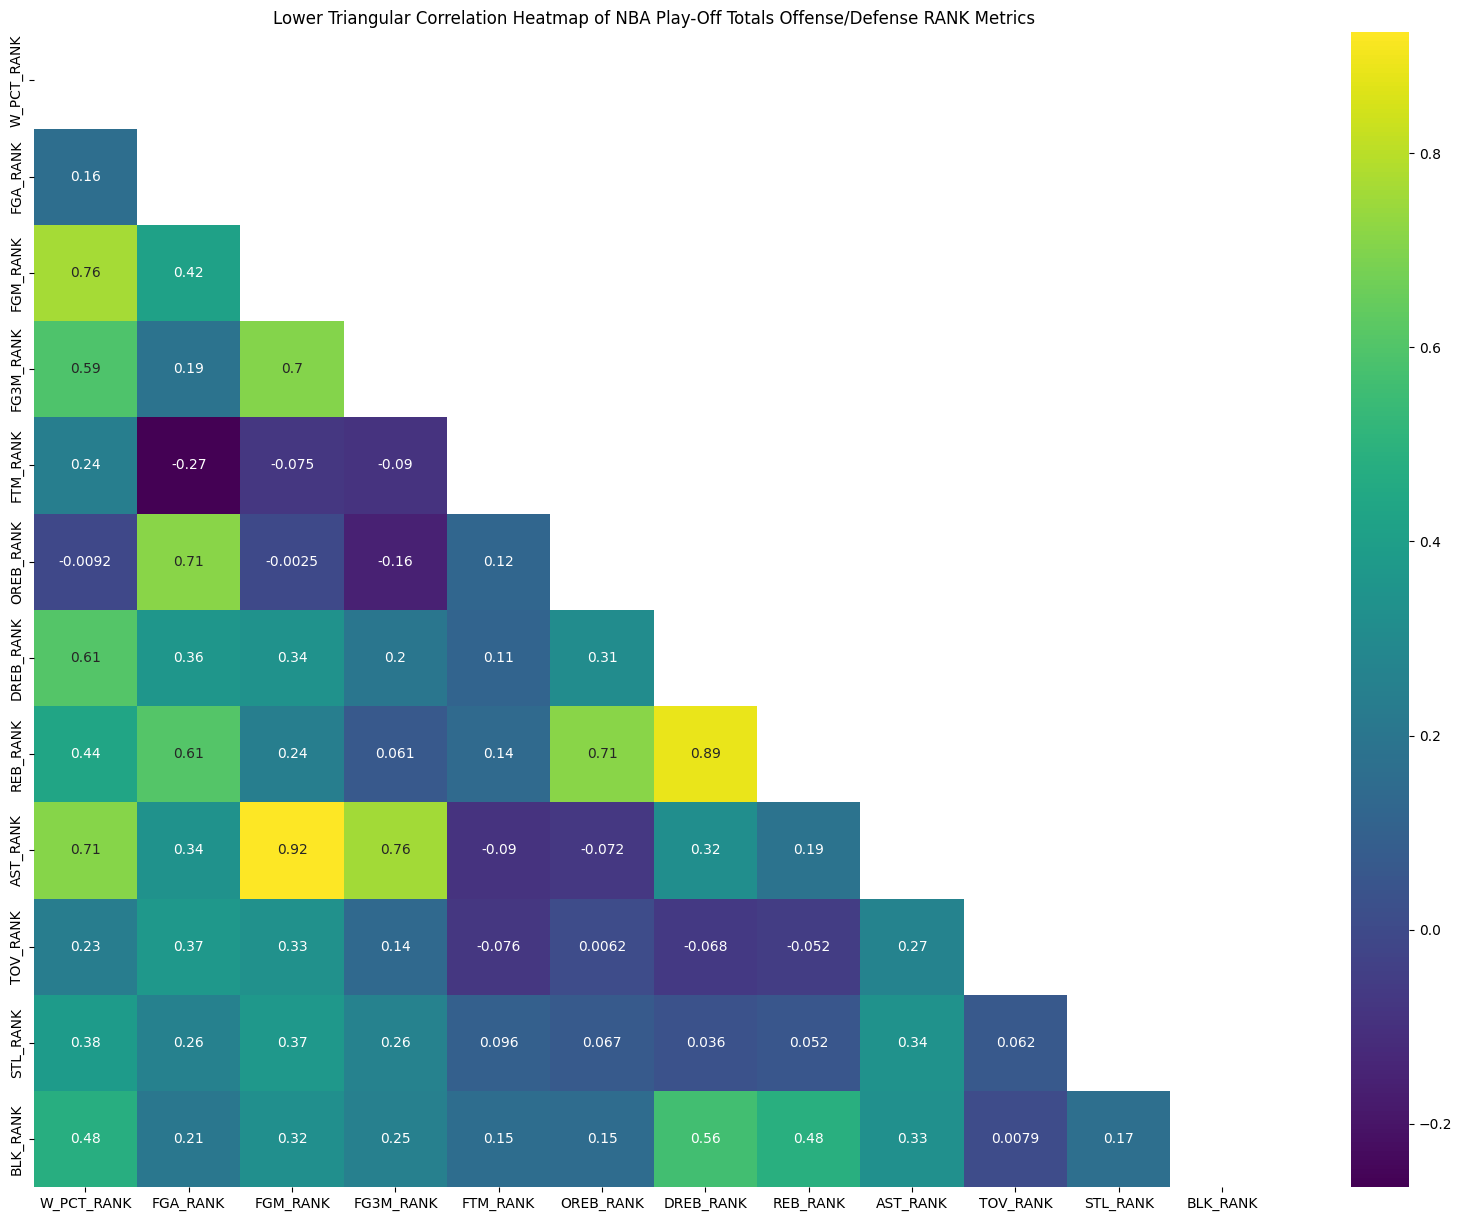

In [98]:
metriCore = play_offTotCorr[["W_PCT_RANK", "FGA_RANK", "FGM_RANK","FG3M_RANK", "FTM_RANK", "OREB_RANK",
"DREB_RANK", "REB_RANK", "AST_RANK", "TOV_RANK", "STL_RANK", "BLK_RANK"]].corr(numeric_only=True)
# create a correlation matrix with only the lower triangle
mask = np.triu(np.ones_like(metriCore, dtype=bool))
# create heatmap
plt.figure(figsize=(20,15))
sns.heatmap(metriCore, mask=mask, annot=True, cmap='viridis')
plt.title('Lower Triangular Correlation Heatmap of NBA Play-Off Totals Offense/Defense RANK Metrics')
plt.show()

##Conclusion

####Our data science team, NBA Analysis 2 Group, set out to find evidence for the old saying, "defense wins championships." Our team discovered an unexpected relationship between winning at the highest level of competition in the NBA and defense. In fact, we were suprised that offense and defense performance indicators shared a similar strength at times. This discovery left us with the overall impression that the NBA game played at the highest level is one of complexity and equitable contribution. Perhaps it's the main reason why the NBA enjoys so many fans worldwide. NBA basketball is a beautiful game worthy of deep praise and deep study. We'd like to leave the reader one more valuable insight that we didn't set out to study: the value of an assist. An assist is a pass from one player to another, a sharing of the ball, that leads to a score in less than 2 dribbles. Fittingly, it too shares a strong positive correlation to a teams total points in a play-off game (0.62). In fact, it is similar in strength to the relationship between 3-point field goals made and total points in a play-off game (0.61). Below we include their correlations and a scatterplot and linear regression model of both relationships for the reader's enjoyment.

In [117]:
play_offTotCorr[["PTS"]]

,PTS
TEAM_ID,-0.04
GAME_ID,0.38
MIN,0.17
FGM,0.86
FGA,0.38
FG_PCT,0.70
FG3M,0.61
FG3A,0.40
FG3_PCT,0.49
FTM,0.26


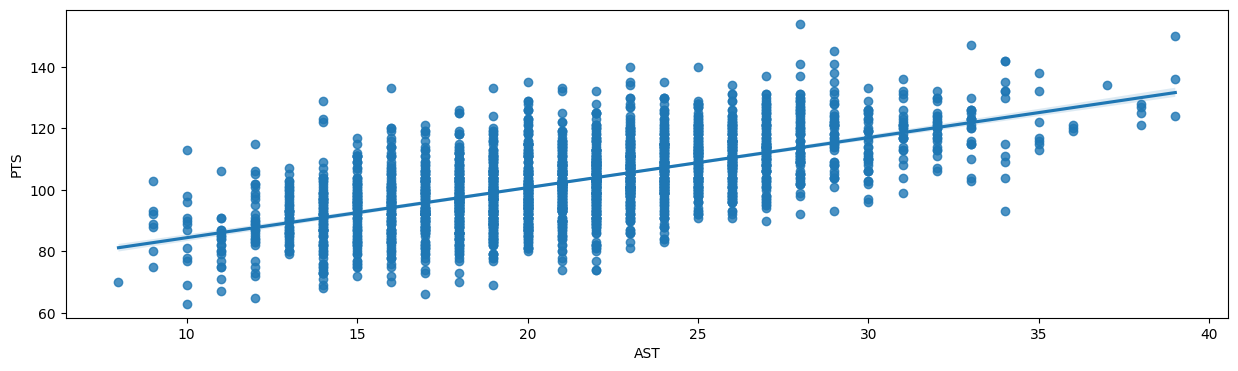

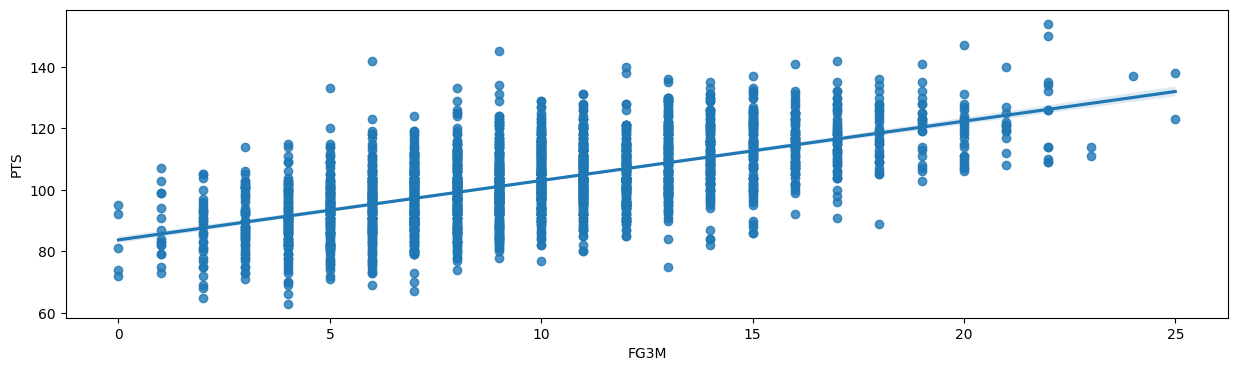

In [118]:
# Fit a regression line to assists and points
f, ax = plt.subplots(figsize = (15,4))
line1 = sns.regplot(x = play_offTot['AST'], y = play_offTot['PTS'],
                    data = play_offTot, ax = ax, label = "Total Game Assists vs. Total Game Points")

# Fit a regression line to field goals made and points
f, ax = plt.subplots(figsize = (15,4))
line1 = sns.regplot(x = play_offTot['FG3M'], y = play_offTot['PTS'],
                    data = play_offTot, ax = ax, label = "Total 3-Point Field Goals Made vs. Total Game Points")